In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Prepare a model for glass classification using KNN

Data Description:

RI : refractive index<br>
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)<br>
Mg: Magnesium<br>
AI: Aluminum<br>
Si: Silicon<br>
K:Potassium<br>
Ca: Calcium<br>
Ba: Barium<br>
Fe: Iron<br>

Type: Type of glass: (class attribute)<br>
 1 -- building_windows_float_processed<br>
 2 --building_windows_non_float_processed<br>
 3 --vehicle_windows_float_processed<br>
 4 --vehicle_windows_non_float_processed (none in this database)<br>
 5 --containers<br>
 6 --tableware<br>
 7 --headlamps<br>

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [6]:
def column_boxplots(df,list_cols):
    for i in list_cols:    
        sns.boxplot(x=i, data = df)
        plt.show()

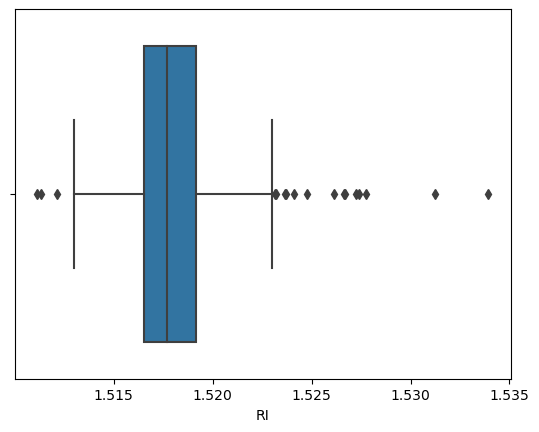

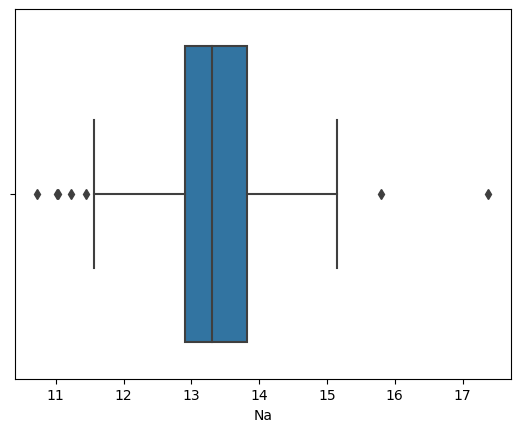

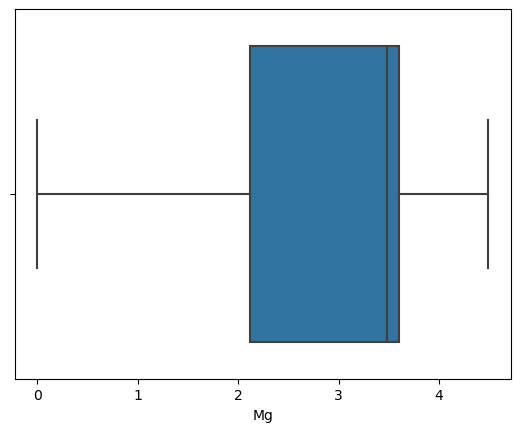

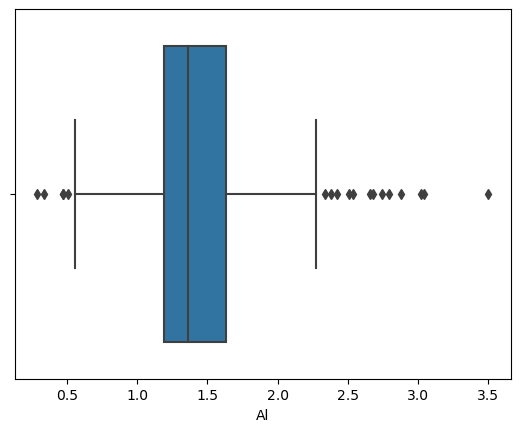

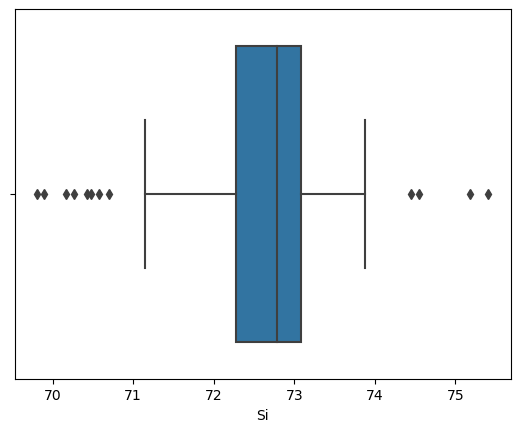

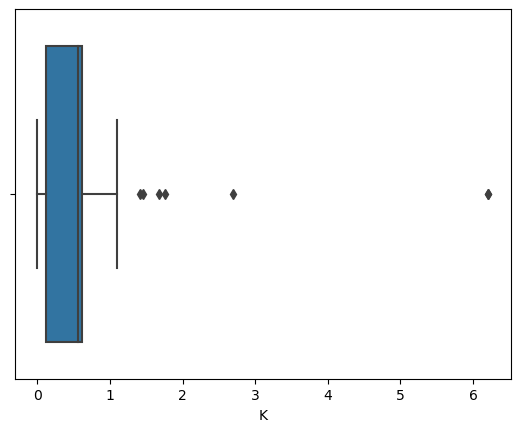

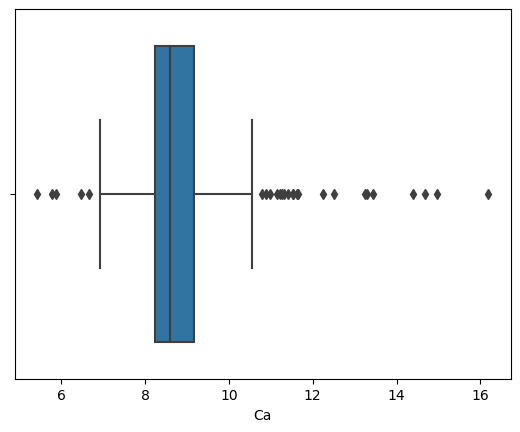

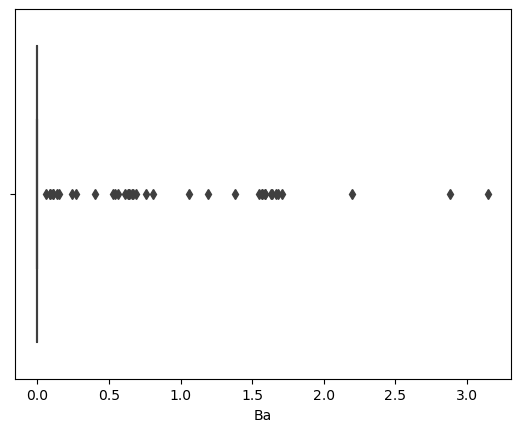

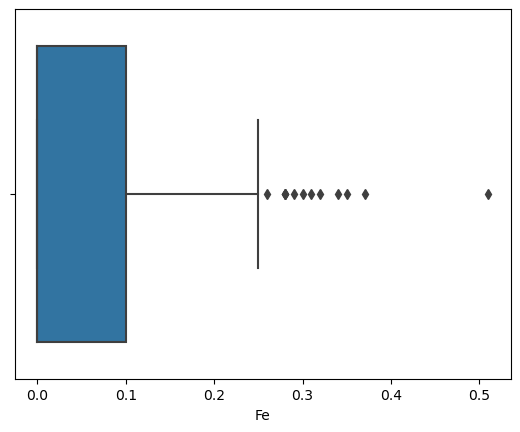

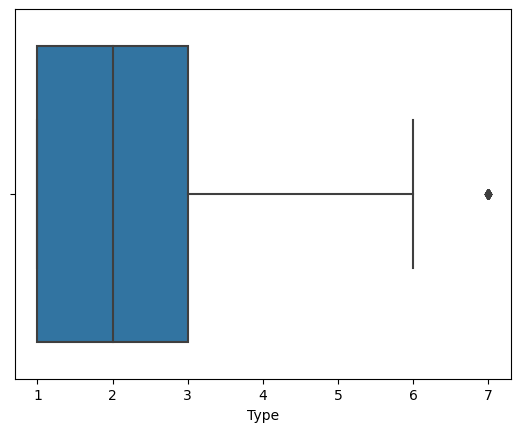

In [7]:
column_boxplots(glass,glass.columns)

RI -- distribution is bit-right skewed and also left skewed(short tail) due to outliers<br>
Na -- distribution is bit-right skewed and also left skewed(short tail) due to outliers<br>
Mg -- distribution is left-skewed<br>
Al -- distribution is bit-right skewed and also left skewed(short tail) due to outliers<br>
Si -- distribution is skewed from both sides due to outliers<br>
K -- distribution is right-skewed and having outliers<br>
Ca -- distribution is bit-right skewed and also left skewed(short tail) due to outliers<br>
Ba -- distribution is right-skewed and having outliers<br>
Fe -- distribution is right-skewed and having outliers<br>

In [8]:
def outliers_to_median_values(df,column_name):
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate the median of the non-outlier data
    median = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].median()

    # Replace outliers with the median
    df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median
    print('Distribution after outlier removal')
    sns.boxplot(x=column_name,data=df)
    plt.show()

In [9]:
columns_num = ['RI','Na','Mg','Al','Si','K','Ca','Fe']

In [10]:
X = glass.drop(labels= "Type" , axis = 1)
y = glass["Type"]
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [11]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


In [12]:
XScaled  = X.apply(zscore)

XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,-2.877034e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.191393e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-1.328117e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-2.988264e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.525091e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,3.527811e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.154278e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-6.640586e-17,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-3.735330e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


Distribution after outlier removal


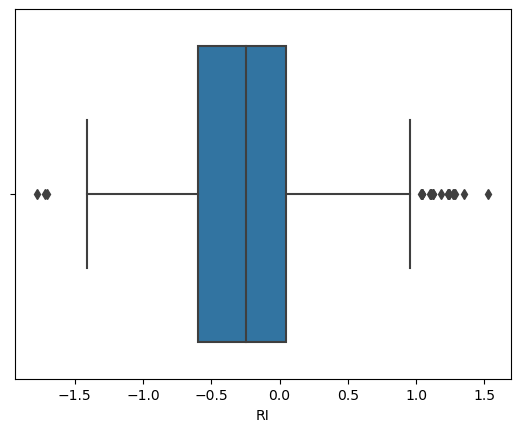

Distribution after outlier removal


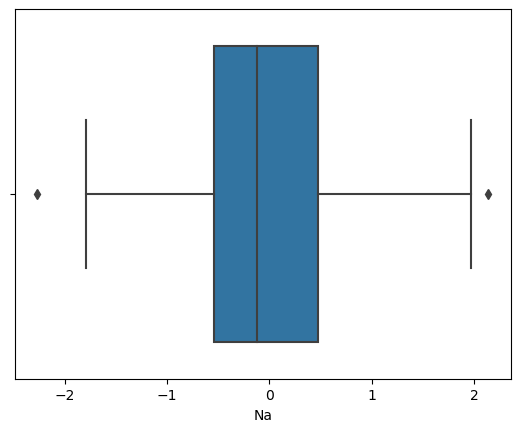

Distribution after outlier removal


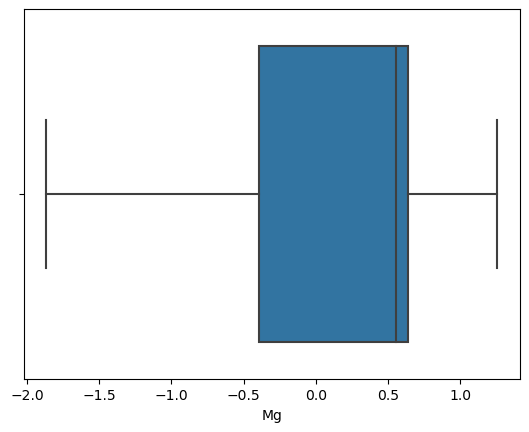

Distribution after outlier removal


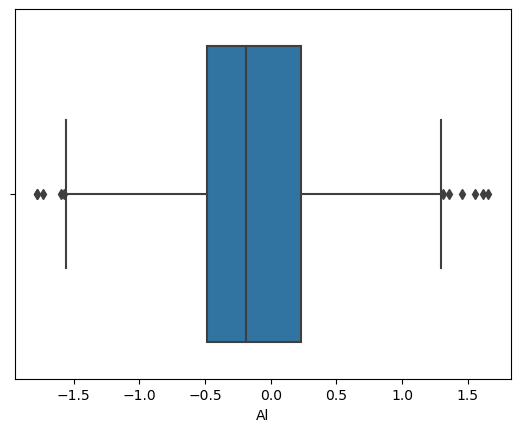

Distribution after outlier removal


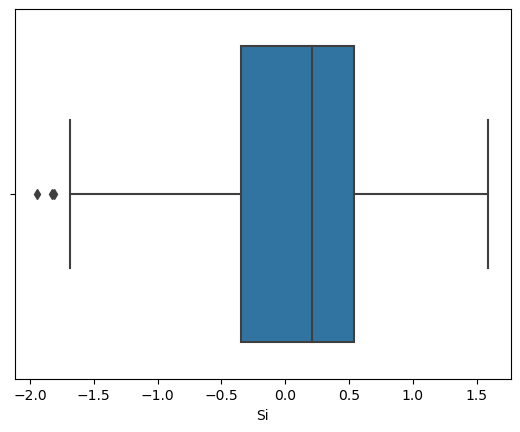

Distribution after outlier removal


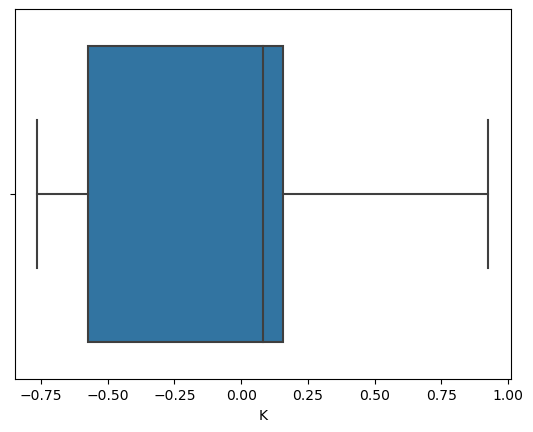

Distribution after outlier removal


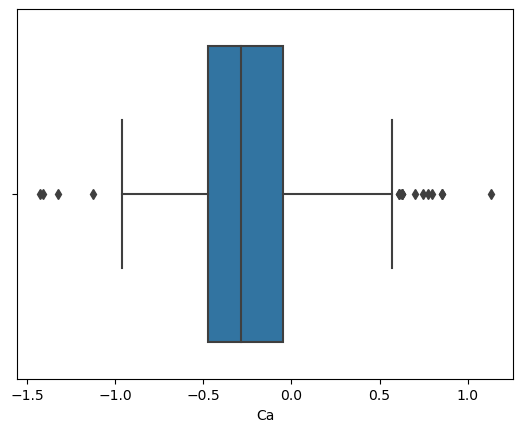

Distribution after outlier removal


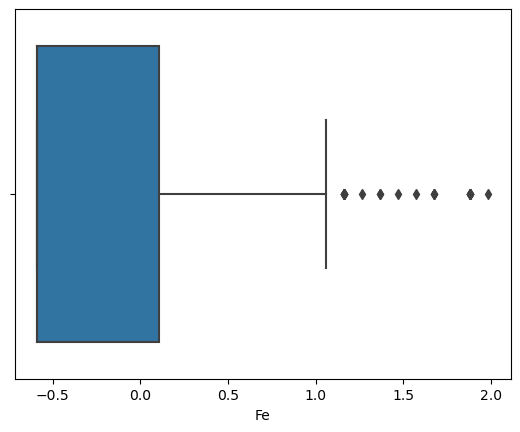

In [13]:
for i in columns_num:
    outliers_to_median_values(XScaled,i)

## KNN

Let's try to perform KNN on Scaled X data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.25)

In [15]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance', metric='euclidean')

In [16]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [17]:
predicted_train_labels = KNN.predict(X_train)
accuracy_score(y_train,predicted_train_labels)

1.0

In [18]:
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.7037037037037037

Let's check the range of K-values and their behaviour

In [19]:
scores =[]
for k in range(1,15):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance', metric='euclidean')
    KNN.fit(X_train, y_train)
    scores.append(KNN.score(X_test, y_test))

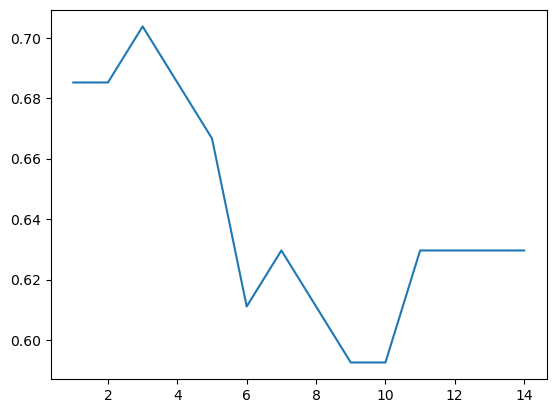

In [20]:
plt.plot(range(1,15),scores)

In [21]:
KNN = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance')

In [22]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [23]:
predicted_train_labels = KNN.predict(X_train)
accuracy_score(y_train,predicted_train_labels)

1.0

In [24]:
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.5925925925925926

In [25]:
scores =[]
for k in range(1,15):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    KNN.fit(X_train, y_train)
    scores.append(KNN.score(X_test, y_test))

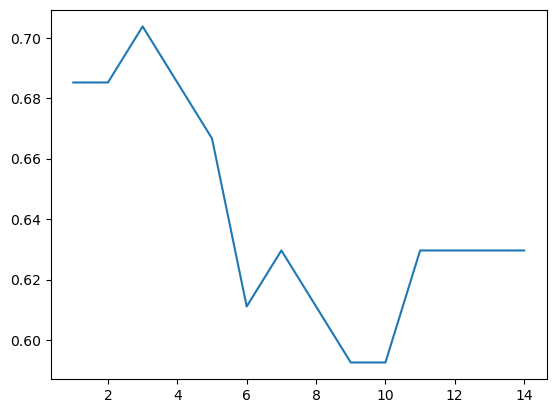

In [26]:
plt.plot(range(1,15),scores)

## Implement a KNN model to classify the animals in to categorie

In [27]:
zoo = pd.read_csv('Zoo.csv')

In [28]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [29]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


While considering X we can remove animal names as it doesn't help in model prediction 

In [30]:
X = zoo.drop(labels= ['animal name','type'] , axis = 1)
y = zoo["type"]
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


## KNN

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [32]:
KNN = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')

In [33]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [34]:
predicted_train_labels = KNN.predict(X_train)
accuracy_score(y_train,predicted_train_labels)

1.0

In [35]:
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

0.8709677419354839

In [36]:
scores =[]
for k in range(1,15):
    KNN = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    KNN.fit(X_train, y_train)
    scores.append(KNN.score(X_test, y_test))

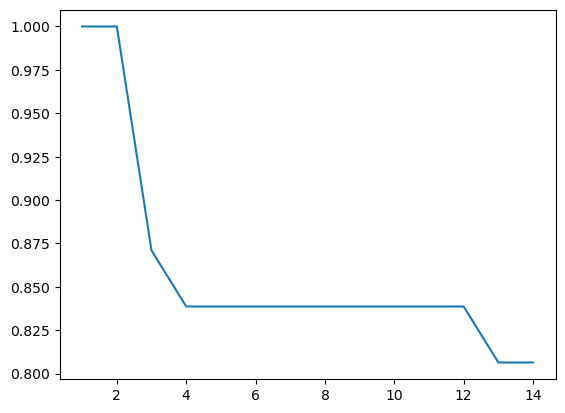

In [37]:
plt.plot(range(1,15),scores)

In [38]:
KNN = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance')

In [39]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [40]:
predicted_train_labels = KNN.predict(X_train)
accuracy_score(y_train,predicted_train_labels)

1.0

In [41]:
predicted_labels = KNN.predict(X_test)
KNN.score(X_test, y_test)

1.0